In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

# Load data

In [2]:
DATA_URL = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"


In [3]:
df = pd.read_csv(DATA_URL)

# Data exploration

In [4]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [6]:
df.size

750

In [7]:
# shape
df.shape

(150, 5)

In [8]:
df['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [9]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [10]:
# info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Split the dataset

In [12]:
X = df.iloc[:, :-1]

In [13]:
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
Y = df.iloc[:, -1]

In [15]:
Y.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

# Data normalization

In [16]:
scaleStandard = preprocessing.StandardScaler()

X = scaleStandard.fit_transform(X)

In [17]:
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [20]:
# standardized data has mean of 0 and std of 1
pd.DataFrame(X).describe().round(3)

,0,1,2,3
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.434,-1.568,-1.447
25%,-0.901,-0.592,-1.227,-1.184
50%,-0.053,-0.132,0.336,0.133
75%,0.675,0.559,0.763,0.791
max,2.492,3.091,1.786,1.712


# Split test and train dataset

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2,
                                                   random_state=2
                                                   )


In [22]:
x_train.shape

(120, 4)

In [23]:
x_test.shape

(30, 4)

# Build a model and predict

In [24]:
knnmodel = KNeighborsClassifier(n_neighbors=3)


In [25]:
knnmodel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
y_predict = knnmodel.predict(x_test)

# Model evaluation

In [27]:
accuracy = accuracy_score(y_test, y_predict)

In [28]:
accuracy

0.9666666666666667

In [29]:
from sklearn.metrics import confusion_matrix

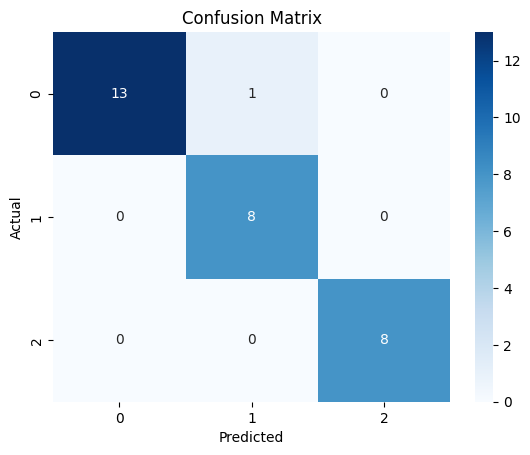

In [30]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Data vizualization

In [31]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


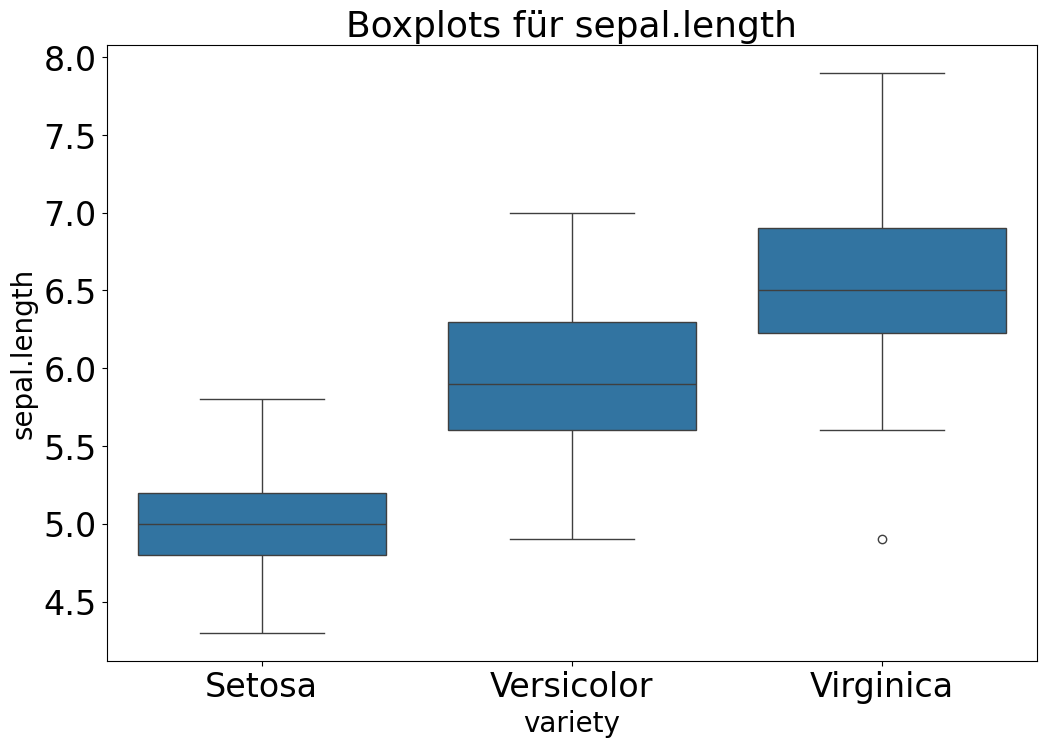

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="variety", y="sepal.length", data=df)

plt.title(f"Boxplots für sepal.length", fontsize=26)
plt.xlabel("variety", fontsize=20)
plt.ylabel("sepal.length", fontsize=20)
plt.tick_params(axis="both", labelsize=24)
plt.show()

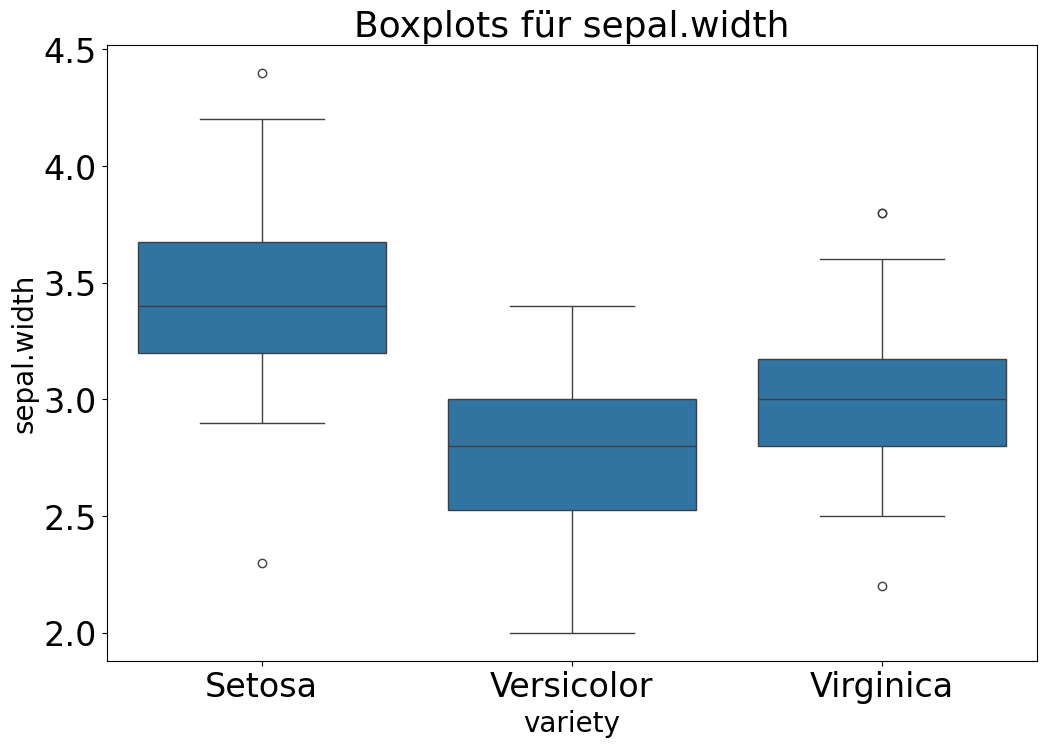

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="variety", y="sepal.width", data=df)

plt.title(f"Boxplots für sepal.width", fontsize=26)
plt.xlabel("variety", fontsize=20)
plt.ylabel("sepal.width", fontsize=20)
plt.tick_params(axis="both", labelsize=24)
plt.show()

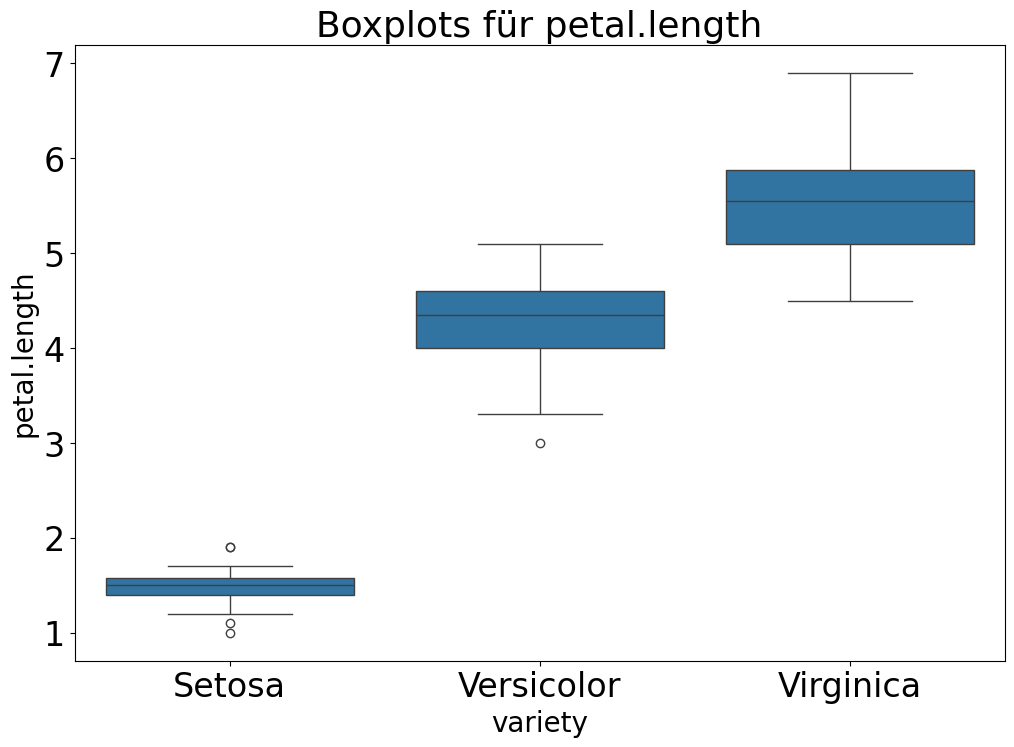

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="variety", y="petal.length", data=df)

plt.title(f"Boxplots für petal.length", fontsize=26)
plt.xlabel("variety", fontsize=20)
plt.ylabel("petal.length", fontsize=20)
plt.tick_params(axis="both", labelsize=24)
plt.show()

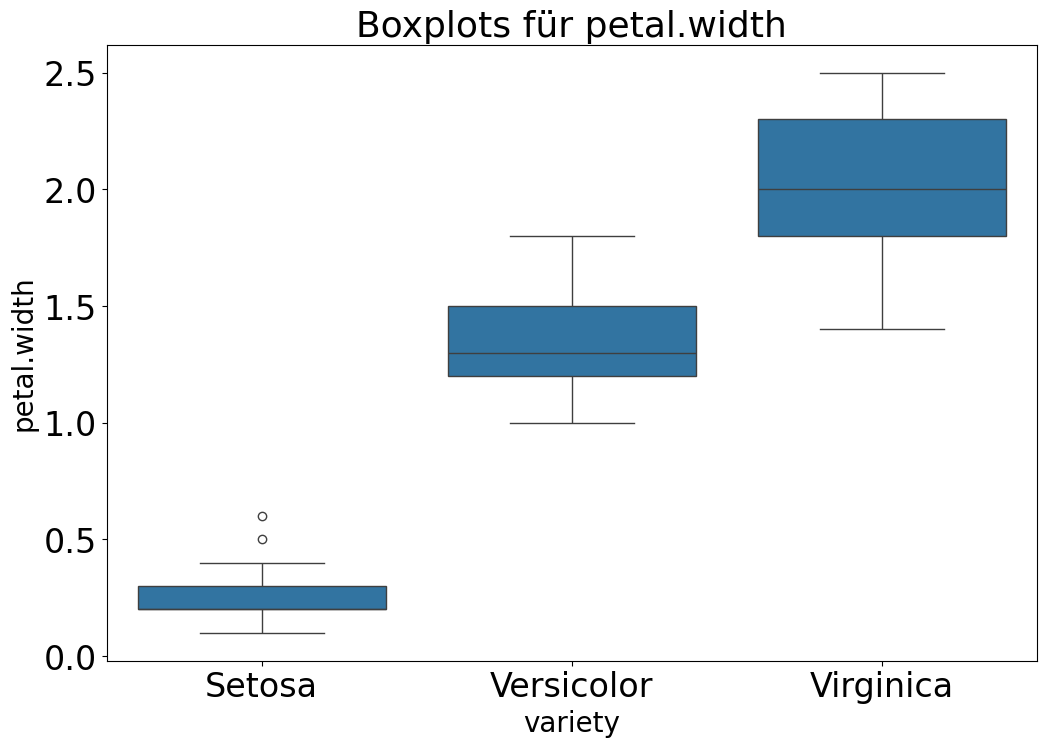

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="variety", y="petal.width", data=df)

plt.title(f"Boxplots für petal.width", fontsize=26)
plt.xlabel("variety", fontsize=20)
plt.ylabel("petal.width", fontsize=20)
plt.tick_params(axis="both", labelsize=24)
plt.show()

# ANOVA test

In [36]:
from scipy.stats import f_oneway

In [53]:
p_values = []

for feature in df.columns:
    if feature != 'variety':
        group_1 = df[feature][df['variety'] == "Setosa"]
        group_2 = df[feature][df['variety'] == "Versicolor"]
        group_3 = df[feature][df['variety'] == "Virginica"]
    
        _, p_val = f_oneway(group_1, group_2, group_3)
        p_values.append(p_val)

In [54]:
p_values

[1.6696691907693826e-31,
 4.492017133309115e-17,
 2.8567766109615584e-91,
 4.169445839443116e-85]

In [55]:
anova_results = pd.DataFrame({"Feature": df.columns[:-1], "p-value": p_values})

In [56]:
anova_results

,Feature,p-value
0,sepal.length,1.669669e-31
1,sepal.width,4.492017e-17
2,petal.length,2.856777e-91
3,petal.width,4.169446e-85
